In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1


In [17]:
from scipy.stats import norm
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import r2_score, mean_squared_error
from DataPrep.load_data import load_data
from DataPrep.LagCreation import lags
from Tobit import Tobit


In [192]:
df = load_data()

In [193]:
l = lags()

In [271]:
testdata = df[df.Label == 0]


In [277]:
testdata = testdata.drop(columns=["Charging Time (mins)","Parking Time (mins)",'# Professional & Other Places',
 '# Food',
 '# Shop & Service',
 '# Travel & Transport',
 '# Outdoors & Recreation',
 '# Arts & Entertainment',
 '# Nightlife Spot',
 '# Residence',
 '# College & University',
 '# Event',
 'Plugs',
 'Label_0',
 'Label_1',
 'Label_2',
 'Label_3',
 'Label_4',
 'Label_5',
 'Label_6',
 'Label_7'])

In [278]:
 testdata.columns

Index(['Label', 'Energy (kWh)', 'Fee (USD)', 'Month_Day_1', 'Month_Day_2',
       'Month_Day_3', 'Month_Day_4', 'Month_Day_5', 'Month_Day_6',
       'Month_Day_7', 'Month_Day_8', 'Month_Day_9', 'Month_Day_10',
       'Month_Day_11', 'Month_Day_12', 'Month_Day_13', 'Month_Day_14',
       'Month_Day_15', 'Month_Day_16', 'Month_Day_17', 'Month_Day_18',
       'Month_Day_19', 'Month_Day_20', 'Month_Day_21', 'Month_Day_22',
       'Month_Day_23', 'Month_Day_24', 'Month_Day_25', 'Month_Day_26',
       'Month_Day_27', 'Month_Day_28', 'Month_Day_29', 'Month_Day_30',
       'Month_Day_31', 'Week_Day_0', 'Week_Day_1', 'Week_Day_2', 'Week_Day_3',
       'Week_Day_4', 'Week_Day_5', 'Week_Day_6', 'Year_Month_1',
       'Year_Month_2', 'Year_Month_3', 'Year_Month_4', 'Year_Month_5',
       'Year_Month_6', 'Year_Month_7', 'Year_Month_8', 'Year_Month_9',
       'Year_Month_10', 'Year_Month_11', 'Year_Month_12'],
      dtype='object')

In [293]:
for i in range(1,13):
    testdata[f"Year_Month_{i}"] = 0
    testdata[f"Year_Month_{i}"][(testdata.index.month==i) & (testdata.index.day==1)] = 1
testdata[f"Year_Month_{testdata.index[0].month}"]=1

ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

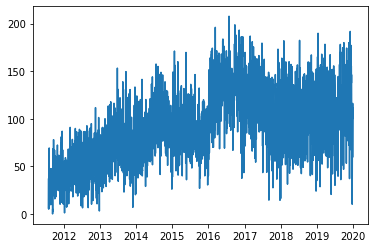

In [303]:
plt.plot(testdata["Energy (kWh)"])
plt.show()

In [304]:
def censor(s):
    energy = s["Energy (kWh)"] 
    energy_lag1 = s["Energy (kWh)_lag1"]
    energy_lag2 = s["Energy (kWh)_lag2"]
    energy_lag3 = s["Energy (kWh)_lag3"]
    energy_lag4 = s["Energy (kWh)_lag4"]
    energy_lag5 = s["Energy (kWh)_lag5"]

    s["Censored"] = False
    if energy > 100:
        s["Energy (kWh)"] = 100
        s["Censored"] = True
    if energy_lag1 > 100:
        s["Energy (kWh)_lag1"] = 100
    if energy_lag2 > 100:
        s["Energy (kWh)_lag2"] = 100
    if energy_lag3 > 100:
        s["Energy (kWh)_lag3"] = 100
    if energy_lag4 > 100:
        s["Energy (kWh)_lag4"] = 100
    if energy_lag5 > 100:
        s["Energy (kWh)_lag5"] = 100
    
    return s

In [305]:
testdata = l.buildLaggedFeatures(testdata,["Energy (kWh)"])

In [306]:
testdata = testdata.apply(censor, axis=1)

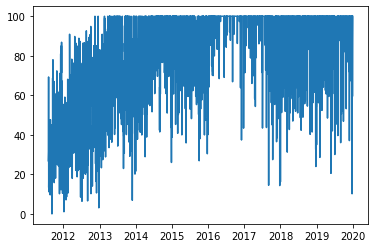

In [307]:
plt.plot(testdata["Energy (kWh)"])
plt.show()

In [203]:
testdata[testdata["Censored"] == False].shape

(1776, 59)

In [308]:
t = Tobit(testdata, 'Censored', list(testdata.drop(columns=["Energy (kWh)","Censored"]).columns), 'Energy (kWh)')

In [327]:
regressor = LinearRegression(fit_intercept=False).fit(testdata.drop(columns=["Energy (kWh)", "Censored"]), testdata["Energy (kWh)"])
pred = regressor.predict(testdata.drop(columns=["Energy (kWh)","Censored"]))

In [328]:
vars = regressor.coef_


In [329]:
vars = np.append(vars,1)

In [97]:
vars = np.array([0.5,0.5,0.5,0.5,0.5,1])

In [330]:
vars

array([ 3.43516942e+05,  1.80266363e-01, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10,  6.16463358e+10,  6.16463358e+10,  6.16463358e+10,
        6.16463358e+10,  6.16463358e+10,  6.16463358e+10,  6.16463358e+10,
       -1.81099319e+01,  4.10960388e+00,  4.07638931e+00,  2.51762390e-01,
        4.02079964e+00,  8.62371254e+00, -6.12331939e+09,  6.50054932e+00,
       -4.85466766e+00,  9.53056335e+00,  8.49263000e+00,  6.09235668e+00,
        2.91397095e-01,  

In [313]:
minimizer = t.minimize(vars)

In [314]:
minimizer["x"]

array([ 3.43516942e+05,  1.84519969e-01, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10,  6.16463358e+10,  6.16463358e+10,  6.16463358e+10,
        6.16463358e+10,  6.16463358e+10,  6.16463358e+10,  6.16463358e+10,
       -1.81099319e+01,  4.10960388e+00,  4.07638931e+00,  2.51762390e-01,
        4.02079964e+00,  8.62371254e+00, -6.12331939e+09,  6.50054932e+00,
       -4.85466810e+00,  9.53056341e+00,  8.49263338e+00,  6.09235660e+00,
        3.27875342e-01,  

In [33]:
from tqdm import tqdm

In [109]:
_mins = []
_i = []
_j = []
_k = []
_a = []
_b = []
with tqdm(total=3**5, file=sys.stdout) as pbar:
    for i in np.linspace(0.1,1,3):
        for j in np.linspace(0.1,1,3):
            for k in np.linspace(0.1,1,3):
                for a in np.linspace(0.1,1,3):
                    for b in np.linspace(0.1,1,3):
                        vars = np.array([i,j,k,a,b,1])
                        mins = t.minimize(vars)
                        if mins.x[-1] > 0:
                            _mins.append(vars)
                            _i.append(i)
                            _j.append(j)
                            _k.append(k)
                            _a.append(a)
                            _b.append(b)
                        pbar.update(1)


100%|██████████| 243/243 [11:37<00:00,  2.87s/it]


In [114]:
_mins

[array([0.1, 0.1, 0.1, 0.1, 0.1, 1. ]),
 array([0.1 , 0.1 , 0.1 , 0.1 , 0.55, 1.  ]),
 array([0.1, 0.1, 0.1, 0.1, 1. , 1. ]),
 array([0.1 , 0.1 , 0.1 , 0.55, 0.1 , 1.  ]),
 array([0.1 , 0.1 , 0.1 , 0.55, 0.55, 1.  ]),
 array([0.1 , 0.1 , 0.1 , 0.55, 1.  , 1.  ]),
 array([0.1, 0.1, 0.1, 1. , 0.1, 1. ]),
 array([0.1 , 0.1 , 0.1 , 1.  , 0.55, 1.  ]),
 array([0.1, 0.1, 0.1, 1. , 1. , 1. ]),
 array([0.1 , 0.1 , 0.55, 0.1 , 0.1 , 1.  ]),
 array([0.1 , 0.1 , 0.55, 0.1 , 0.55, 1.  ]),
 array([0.1 , 0.1 , 0.55, 0.1 , 1.  , 1.  ]),
 array([0.1 , 0.1 , 0.55, 0.55, 0.1 , 1.  ]),
 array([0.1 , 0.1 , 0.55, 0.55, 0.55, 1.  ]),
 array([0.1 , 0.1 , 0.55, 0.55, 1.  , 1.  ]),
 array([0.1 , 0.1 , 0.55, 1.  , 0.1 , 1.  ]),
 array([0.1 , 0.1 , 0.55, 1.  , 0.55, 1.  ]),
 array([0.1, 0.1, 1. , 0.1, 0.1, 1. ]),
 array([0.1 , 0.1 , 1.  , 0.1 , 0.55, 1.  ]),
 array([0.1, 0.1, 1. , 0.1, 1. , 1. ]),
 array([0.1 , 0.1 , 1.  , 0.55, 0.1 , 1.  ]),
 array([0.1 , 0.1 , 1.  , 0.55, 0.55, 1.  ]),
 array([0.1, 0.1, 1. , 1

In [112]:
pd.DataFrame({"l2":_j,"l3":_k,"l4":_a,"l5":_b})

,l2,l3,l4,l5
0,0.10,0.10,0.10,0.10
1,0.10,0.10,0.10,0.55
2,0.10,0.10,0.10,1.00
3,0.10,0.10,0.55,0.10
4,0.10,0.10,0.55,0.55
...,...,...,...,...
91,0.55,0.10,0.10,0.10
92,0.55,0.10,0.10,0.55
93,0.55,0.10,0.55,0.10
94,0.55,0.55,0.10,0.10


In [121]:
for i in _mins:
    m = t.minimize(i)
    print(i)
    print(m.x)
    

[0.1 0.1 0.1 0.1 0.1 1. ]
[0.21621936 0.21020688 0.1957836  0.22213584 0.17212956 1.11387057]
[0.1  0.1  0.1  0.1  0.55 1.  ]
[0.2162201  0.21020784 0.19578171 0.22213517 0.17213004 1.11387202]
[0.1 0.1 0.1 0.1 1.  1. ]
[0.21622004 0.21020775 0.19578164 0.22213503 0.17213043 1.11387195]
[0.1  0.1  0.1  0.55 0.1  1.  ]
[0.21621994 0.21020788 0.19578173 0.22213487 0.17213019 1.11387203]
[0.1  0.1  0.1  0.55 0.55 1.  ]
[0.21622    0.21020782 0.19578159 0.22213524 0.17213025 1.11387195]
[0.1  0.1  0.1  0.55 1.   1.  ]
[0.21622008 0.21020774 0.19578164 0.22213507 0.17213037 1.11387199]
[0.1 0.1 0.1 1.  0.1 1. ]
[0.21621983 0.21020773 0.19578151 0.22213569 0.17213018 1.11387221]
[0.1  0.1  0.1  1.   0.55 1.  ]
[0.21622095 0.21020596 0.1957819  0.22213663 0.17212927 1.11387092]
[0.1 0.1 0.1 1.  1.  1. ]
[0.21622158 0.21020635 0.19578163 0.22213638 0.17212902 1.11387196]
[0.1  0.1  0.55 0.1  0.1  1.  ]
[0.21622    0.21020772 0.19578153 0.22213515 0.1721304  1.11387208]
[0.1  0.1  0.55 0.1  0.5

In [315]:
sd = minimizer['x'][-1]
beta = minimizer['x'][:-1]

In [316]:
sd

1.2944153654922874

In [317]:
beta

array([ 3.43516942e+05,  1.84519969e-01, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10,  6.16463358e+10,  6.16463358e+10,  6.16463358e+10,
        6.16463358e+10,  6.16463358e+10,  6.16463358e+10,  6.16463358e+10,
       -1.81099319e+01,  4.10960388e+00,  4.07638931e+00,  2.51762390e-01,
        4.02079964e+00,  8.62371254e+00, -6.12331939e+09,  6.50054932e+00,
       -4.85466810e+00,  9.53056341e+00,  8.49263338e+00,  6.09235660e+00,
        3.27875342e-01,  

In [318]:
regressor.coef_

array([ 3.43516942e+05,  1.80266363e-01, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10, -5.55230164e+10, -5.55230164e+10, -5.55230164e+10,
       -5.55230164e+10,  6.16463358e+10,  6.16463358e+10,  6.16463358e+10,
        6.16463358e+10,  6.16463358e+10,  6.16463358e+10,  6.16463358e+10,
       -1.81099319e+01,  4.10960388e+00,  4.07638931e+00,  2.51762390e-01,
        4.02079964e+00,  8.62371254e+00, -6.12331939e+09,  6.50054932e+00,
       -4.85466766e+00,  9.53056335e+00,  8.49263000e+00,  6.09235668e+00,
        2.91397095e-01,  

In [319]:
pred_tobit = t.predict(np.array(testdata.drop(columns=["Energy (kWh)","Censored"])),beta)

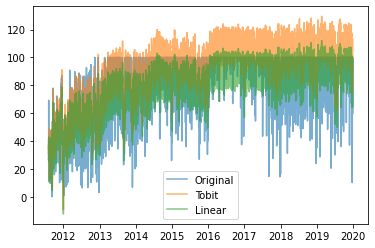

In [320]:
plt.plot(testdata["Energy (kWh)"], label = "Original", alpha = 0.6)
plt.plot(testdata.index,pred_tobit, label = "Tobit", alpha = 0.6)
plt.plot(testdata.index,pred, label = "Linear", alpha = 0.6)

plt.legend()
plt.show()

In [321]:
np.sqrt(mean_squared_error(df["Energy (kWh)"][(df.Label == 0.0)][5:], pred_tobit))

24.785204508705977

In [322]:
np.sqrt(mean_squared_error(df["Energy (kWh)"][(df.Label == 0.0)][5:], pred))

28.317805498551774

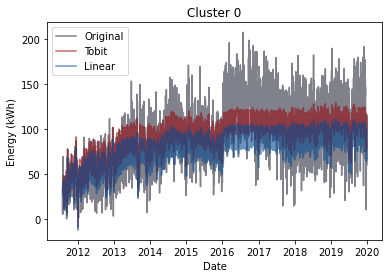

In [341]:
cmap = plt.cm.bone
rmap = plt.cm.Reds
bmap = plt.cm.Blues

plt.plot(df["Energy (kWh)"][df.Label == 0.0], label = "Original", alpha = 0.6, color=cmap(0.2))
plt.plot(testdata.index,pred_tobit, label = "Tobit", alpha = 0.6, color=rmap(0.9))
plt.plot(testdata.index,pred, label = "Linear", alpha = 0.6, color=bmap(0.9))
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.title("Cluster 0")
plt.legend()
plt.show()

In [324]:
r2_score(df["Energy (kWh)"][df.Label == 0.0][5:], pred_tobit)

0.5576782641226523

In [325]:
r2_score(df["Energy (kWh)"][df.Label == 0.0][5:], pred)

0.42260574711624244

In [28]:
from sklearn.metrics import mean_absolute_error



In [29]:
mean_absolute_error(df["Energy (kWh)"][df.Label == 0.0], pred_tobit)

0.3165387656320173

In [30]:
mean_absolute_error(df["Energy (kWh)"][df.Label == 0.0], pred)

0.31109770821282523

In [31]:
mean_squared_error(df["Energy (kWh)"][df.Label == 0.0], pred_tobit)

0.1738560036810394

In [32]:
mean_squared_error(df["Energy (kWh)"][df.Label == 0.0], pred)

0.16970687574924748